In [1]:
import pandas as pd
import sys
from pathlib import Path
import pastas as ps

# Add the 'scripts' directory to sys.path
scripts_path = Path("../scripts").resolve()
if str(scripts_path) not in sys.path:
    sys.path.append(str(scripts_path))


### Loading Input Files

In [2]:
from knmi_pull import fetch_knmi_prec_evap
data = fetch_knmi_prec_evap("249", "2000-01-01", "2025-06-01")

In [3]:
prec = data[0]
evap = data[1]

In [4]:
# 1. Load Excel file
file_path_excel = Path("../input_files/input_single/Fugro_HB28_PB1.xlsx")
df_head = pd.read_excel(file_path_excel)

print(df_head.head())

                 Time  HB28-PB1
0 2023-11-09 11:00:00       NaN
1 2023-11-09 12:00:00       NaN
2 2023-11-09 13:00:00       NaN
3 2023-11-09 14:00:00       NaN
4 2023-11-09 15:00:00       NaN


In [5]:
# 2. Convert 'time' column to datetime using flexible parsing
df_head['time'] = pd.to_datetime(df_head['Time'], format='mixed', dayfirst=True)

# 3. Set datetime column as index
df_head.set_index('time', inplace=True)

# 4. Resample to daily mean
head_daily_mean = df_head['HB28-PB1'].resample("D").mean().dropna()

#### Waterhoogte systeem

In [6]:
# 1. Load Excel file
file_path_waterhoogte = Path("../input_files/input_single/waterhoogte_drieban.xlsx")
df = pd.read_excel(file_path_waterhoogte)

# 2. Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# 3. Set datetime as index
df.set_index('datetime', inplace=True)

# 4. Resample to daily mean (will have missing dates if no data on some days)
waterhoogte_daily_mean = df['waterhoogte'].resample("D").mean()

# 5. Fill missing days with a method or value, e.g., forward fill or zero (if appropriate)
waterhoogte_daily_mean = waterhoogte_daily_mean.ffill()  # or .bfill(), or .fillna(0)

# 6. Now frequency can be inferred correctly
waterhoogte_daily_mean.index.freq = "D"

### Gegevenscontrole

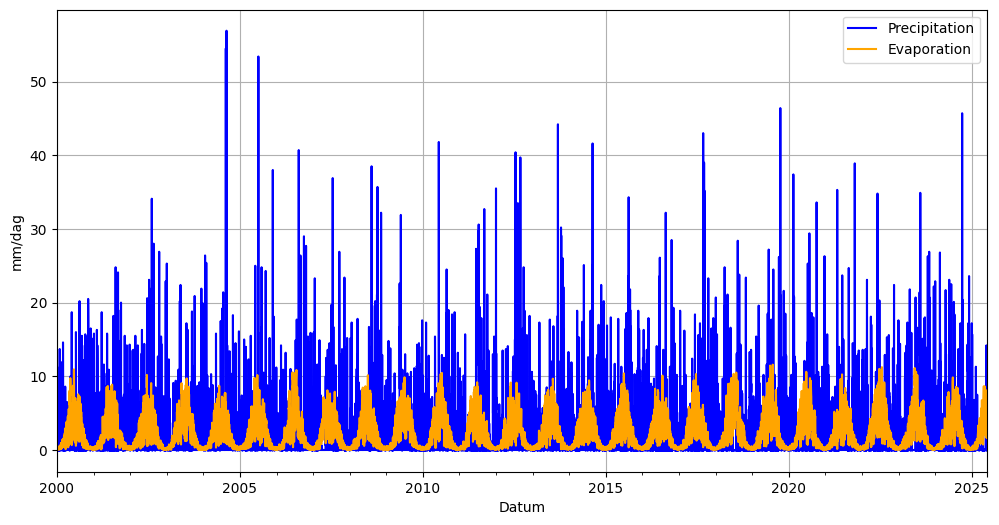

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_prec_evap(prec: pd.Series, evap: pd.Series) -> None:
    """
    Plot precipitation and evaporation time series on the same axes.

    Args:
        prec (pd.Series): Precipitation data.
        evap (pd.Series): Evaporation data.
    """
    ax = prec.plot(label="Precipitation", color="blue", figsize=(12, 6))
    evap.plot(ax=ax, label="Evaporation", color="orange")
    ax.set_xlabel("Datum")
    ax.set_ylabel("mm/dag")
    ax.grid(True)
    ax.legend()
    plt.show()

plot_prec_evap(prec, evap)

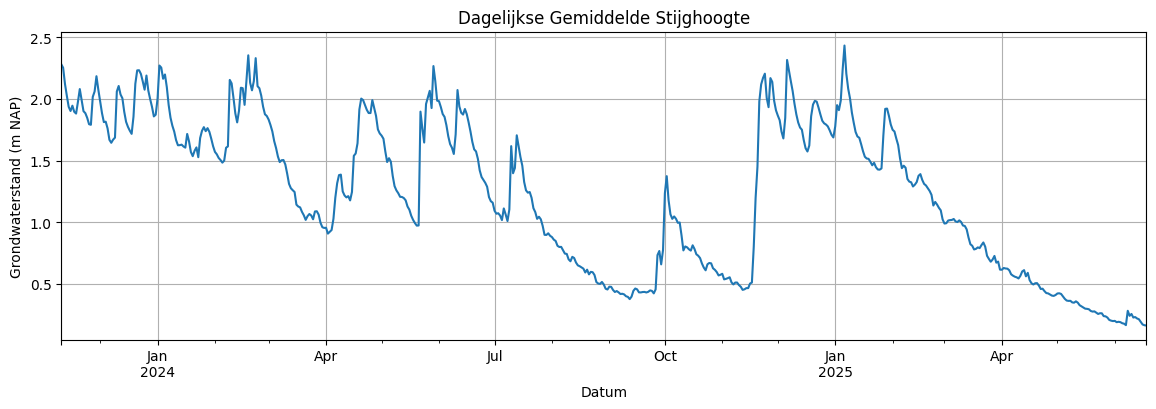

In [ ]:
def plot_head_series(head_series: pd.Series) -> None:
    """
    Plot daily mean groundwater head time series.

    Args:
        head_series (pd.Series): Groundwater head data.
    """
    ax = head_series.plot(figsize=(14, 4), title="Dagelijkse Gemiddelde Stijghoogte")
    ax.set_xlabel("Datum")
    ax.set_ylabel("Grondwaterstand (m NAP)")
    ax.grid(True)
    plt.show()

plot_head_series(head_daily_mean)


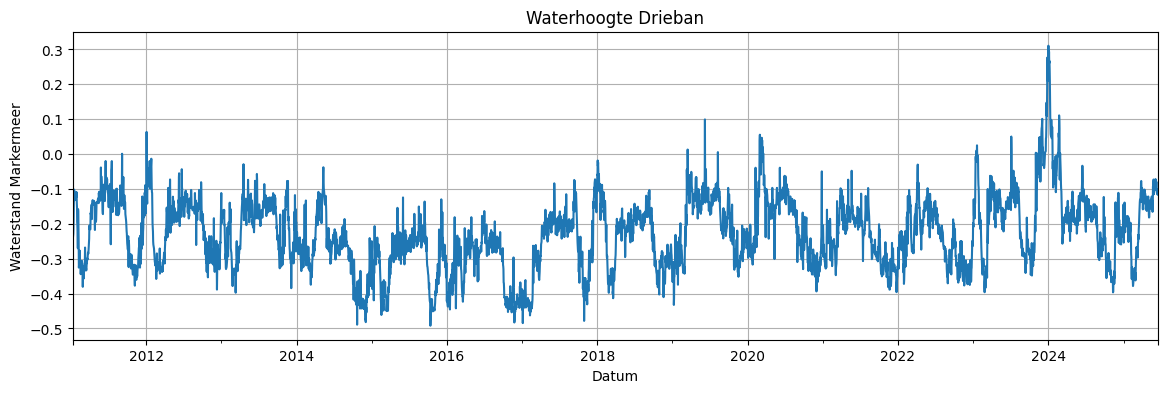

In [ ]:
def plot_waterhoogte(waterhoogte_series: pd.Series) -> None:
    """
    Plot daily mean water level time series.

    Args:
        waterhoogte_series (pd.Series): Water level data.
    """
    ax = waterhoogte_series.plot(figsize=(14, 4), title="Waterhoogte Drieban")
    ax.set_xlabel("Datum")
    ax.set_ylabel("Waterstand Markermeer")
    ax.grid(True)
    plt.show()

plot_waterhoogte(waterhoogte_daily_mean)


In [10]:
start_head_series = head_daily_mean.index.min()
end_head_series = head_daily_mean.index.max()

print(start_head_series, end_head_series)

2023-11-10 00:00:00 2025-06-18 00:00:00


### Monte Carlo Doen

Running model: Linear_Exponential


The integral is probably divergent, or slowly convergent.The integral is probably divergent, or slowly convergent.

Running model: Linear_Gamma
Running model: Linear_DoubleExponential
Running model: Linear_DoubleExponential


The integral is probably divergent, or slowly convergent.The integral is probably divergent, or slowly convergent.

Running model: Linear_Hantush
Running model: Linear_FourParam
Running model: Linear_FourParam


The integral is probably divergent, or slowly convergent.The integral is probably divergent, or slowly convergent.

Running model: FlexModel_Exponential
Running model: FlexModel_Gamma
Running model: FlexModel_Gamma
Running model: FlexModel_DoubleExponential
Running model: FlexModel_DoubleExponential
Running model: FlexModel_Hantush
Running model: FlexModel_Hantush
Running model: FlexModel_FourParam
Running model: FlexModel_FourParam


The integral is probably divergent, or slowly convergent.The integral is probably divergent, or slowly convergent.

Running model: Berendrecht_Exponential
Running model: Berendrecht_Gamma
Running model: Berendrecht_Gamma


The integral is probably divergent, or slowly convergent.The integral is probably divergent, or slowly convergent.

Running model: Berendrecht_DoubleExponential
Running model: Berendrecht_Hantush
Running model: Berendrecht_Hantush


invalid value encountered in castThe algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.

Running model: Berendrecht_FourParam


The integral is probably divergent, or slowly convergent.The integral is probably divergent, or slowly convergent.

Top-performing models:
                            model RechargeModel      RechargeRfunc        EVP  \
2        Linear_DoubleExponential        Linear  DoubleExponential  83.300412   
0              Linear_Exponential        Linear        Exponential  82.028516   
7     FlexModel_DoubleExponential     FlexModel  DoubleExponential  72.888796   
10        Berendrecht_Exponential   Berendrecht        Exponential  65.244518   
12  Berendrecht_DoubleExponential   Berendrecht  DoubleExponential  60.567946   

          R2      RMSE          AIC          BIC  
2   0.833002  0.250221 -2827.949053 -2779.823780  
0   0.820285  0.259573 -2830.995399 -2791.620176  
7   0.728753  0.318896 -2888.201303 -2826.950956  
10  0.652198  0.361105 -2875.676692 -2827.551419  
12  0.605678  0.384497 -2873.855196 -2816.979873  




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


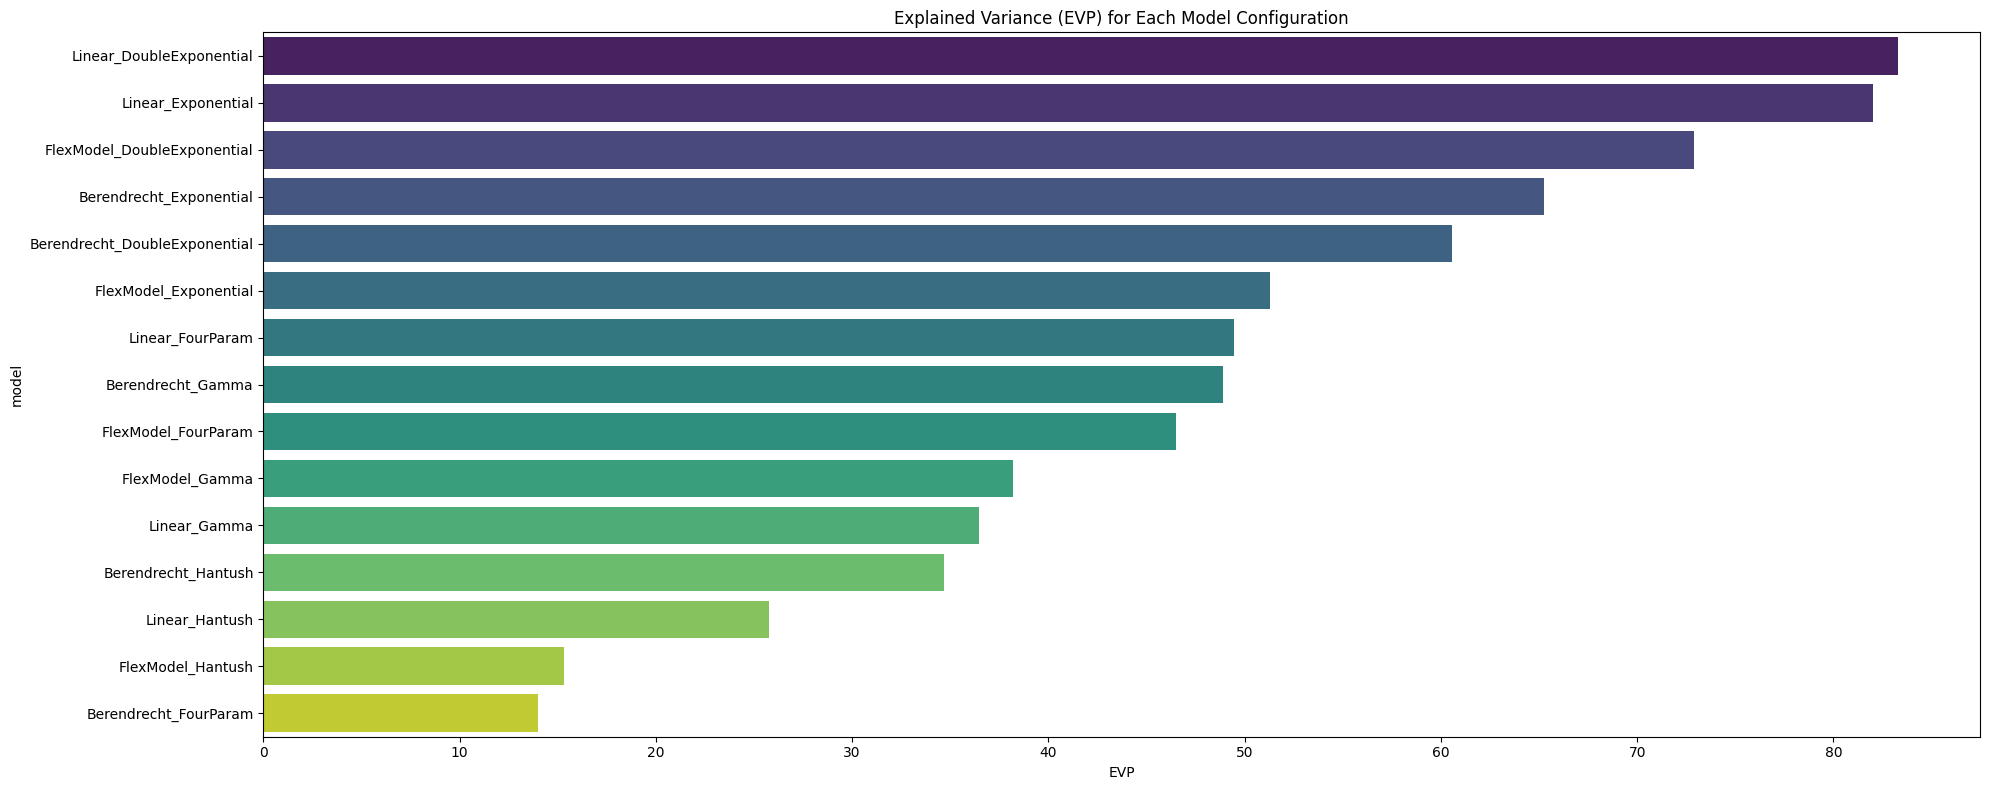

In [11]:
import pastas as ps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define model components
recharge_models = {
    "Linear": ps.rch.Linear(),
    "FlexModel": ps.rch.FlexModel(),
    "Berendrecht": ps.rch.Berendrecht()
}

response_functions = {
    "Exponential": ps.Exponential(),
    "Gamma": ps.Gamma(),
    "DoubleExponential": ps.DoubleExponential(),
    "Hantush": ps.Hantush(),
    "FourParam": ps.FourParam(),
}

# Result containers
results = []
diagnostics_list = []

# Loop over recharge and response function combinations
for rch_name, rch_model in recharge_models.items():
    for rfunc_name, rfunc in response_functions.items():
        model_name = f"{rch_name}_{rfunc_name}"
        print(f"Running model: {model_name}")

        try:
            # 1. Create model
            ml = ps.Model(head_daily_mean, name=model_name)

            # 2. Add recharge stressmodel
            rm = ps.RechargeModel(
                prec=prec,
                evap=evap,
                recharge=rch_model,
                rfunc=rfunc,
                name="rch"
            )
            ml.add_stressmodel(rm)

            # 3. Add extra stressor
            extra = ps.StressModel(
                waterhoogte_daily_mean,
                rfunc=ps.FourParam(),
                name="extra",
                settings="prec",
                up=True
            )
            ml.add_stressmodel(extra)

            # 4. Add noise model
            ml.add_noisemodel(ps.ArNoiseModel())

            # 5. Solve the model
            ml.solve(
                tmin=start_head_series,
                tmax=end_head_series,
                solver=ps.LeastSquares(),
                report=False
            )

            # 6. Store performance metrics
            stats = ml.stats
            results.append({
                "model": model_name,
                "RechargeModel": rch_name,
                "RechargeRfunc": rfunc_name,
                "EVP": stats.evp(),
                "R2": stats.rsq(),
                "RMSE": stats.rmse(),
                "AIC": stats.aic(),
                "BIC": stats.bic()
            })

            # 7. Store diagnostics
            diag_df = ml.stats.diagnostics(alpha=0.05).copy()
            diag_df["model"] = model_name
            diagnostics_list.append(diag_df)

        except Exception as e:
            print(f"Model {model_name} failed: {e}")
            results.append({
                "model": model_name,
                "RechargeModel": rch_name,
                "RechargeRfunc": rfunc_name,
                "EVP": None,
                "R2": None,
                "RMSE": None,
                "AIC": None,
                "BIC": None,
                "error": str(e)
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="EVP", ascending=False)

# Combine diagnostics
if diagnostics_list:
    diagnostics_df = pd.concat(diagnostics_list).reset_index()
    diagnostics_df.rename(columns={"index": "Test"}, inplace=True)
    diagnostics_df = diagnostics_df[["model", "Test", "Checks", "Statistic", "P-value", "Reject H0 ($\\alpha$=0.05)"]]
else:
    diagnostics_df = pd.DataFrame()

# Display top results
print("Top-performing models:")
print(results_df.head())

# Optional: plot
plt.figure(figsize=(20, 8))
sns.barplot(data=results_df, y="model", x="EVP", palette="viridis")
plt.title("Explained Variance (EVP) for Each Model Configuration")
plt.tight_layout()
plt.show()


In [12]:
results_df

,model,RechargeModel,RechargeRfunc,EVP,R2,RMSE,AIC,BIC
2,Linear_DoubleExponential,Linear,DoubleExponential,83.300412,0.833002,0.250221,-2827.949053,-2779.823780
0,Linear_Exponential,Linear,Exponential,82.028516,0.820285,0.259573,-2830.995399,-2791.620176
7,FlexModel_DoubleExponential,FlexModel,DoubleExponential,72.888796,0.728753,0.318896,-2888.201303,-2826.950956
10,Berendrecht_Exponential,Berendrecht,Exponential,65.244518,0.652198,0.361105,-2875.676692,-2827.551419
12,Berendrecht_DoubleExponential,Berendrecht,DoubleExponential,60.567946,0.605678,0.384497,-2873.855196,-2816.979873
5,FlexModel_Exponential,FlexModel,Exponential,51.283114,0.500466,0.432763,-2924.745073,-2872.244775
4,Linear_FourParam,Linear,FourParam,49.429288,0.474556,0.443844,-2692.838348,-2644.713075
11,Berendrecht_Gamma,Berendrecht,Gamma,48.901463,0.482882,0.440314,-2851.724994,-2799.224696
9,FlexModel_FourParam,FlexModel,FourParam,46.515521,0.451887,0.453317,-2687.976089,-2626.725741
6,FlexModel_Gamma,FlexModel,Gamma,38.187194,0.368744,0.486485,-2871.298795,-2814.423473




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


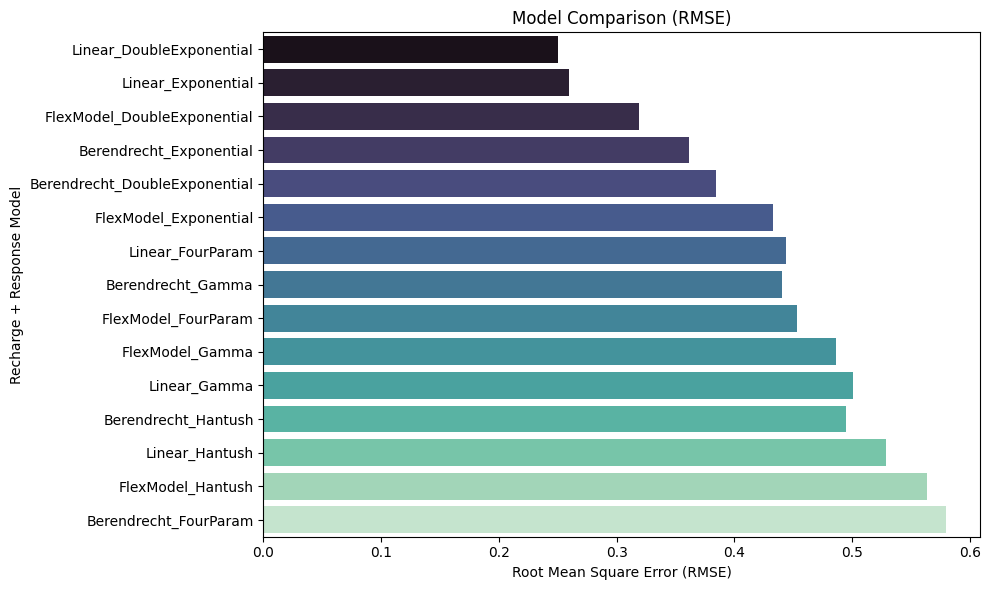

In [ ]:
def plot_rmse_bar(results_df: pd.DataFrame) -> None:
    """
    Plot a bar chart of RMSE for each model configuration.

    Args:
        results_df (pd.DataFrame): DataFrame with model results including 'model' and 'RMSE'.
    """
    import seaborn as sns
    import matplotlib.pyplot as plt  # Moved import statement here
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, y="model", x="RMSE", palette="mako")
    plt.title("Model Comparison (RMSE)")
    plt.xlabel("Root Mean Square Error (RMSE)")
    plt.ylabel("Recharge + Response Model")
    plt.tight_layout()
    plt.show()

plot_rmse_bar(results_df)



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


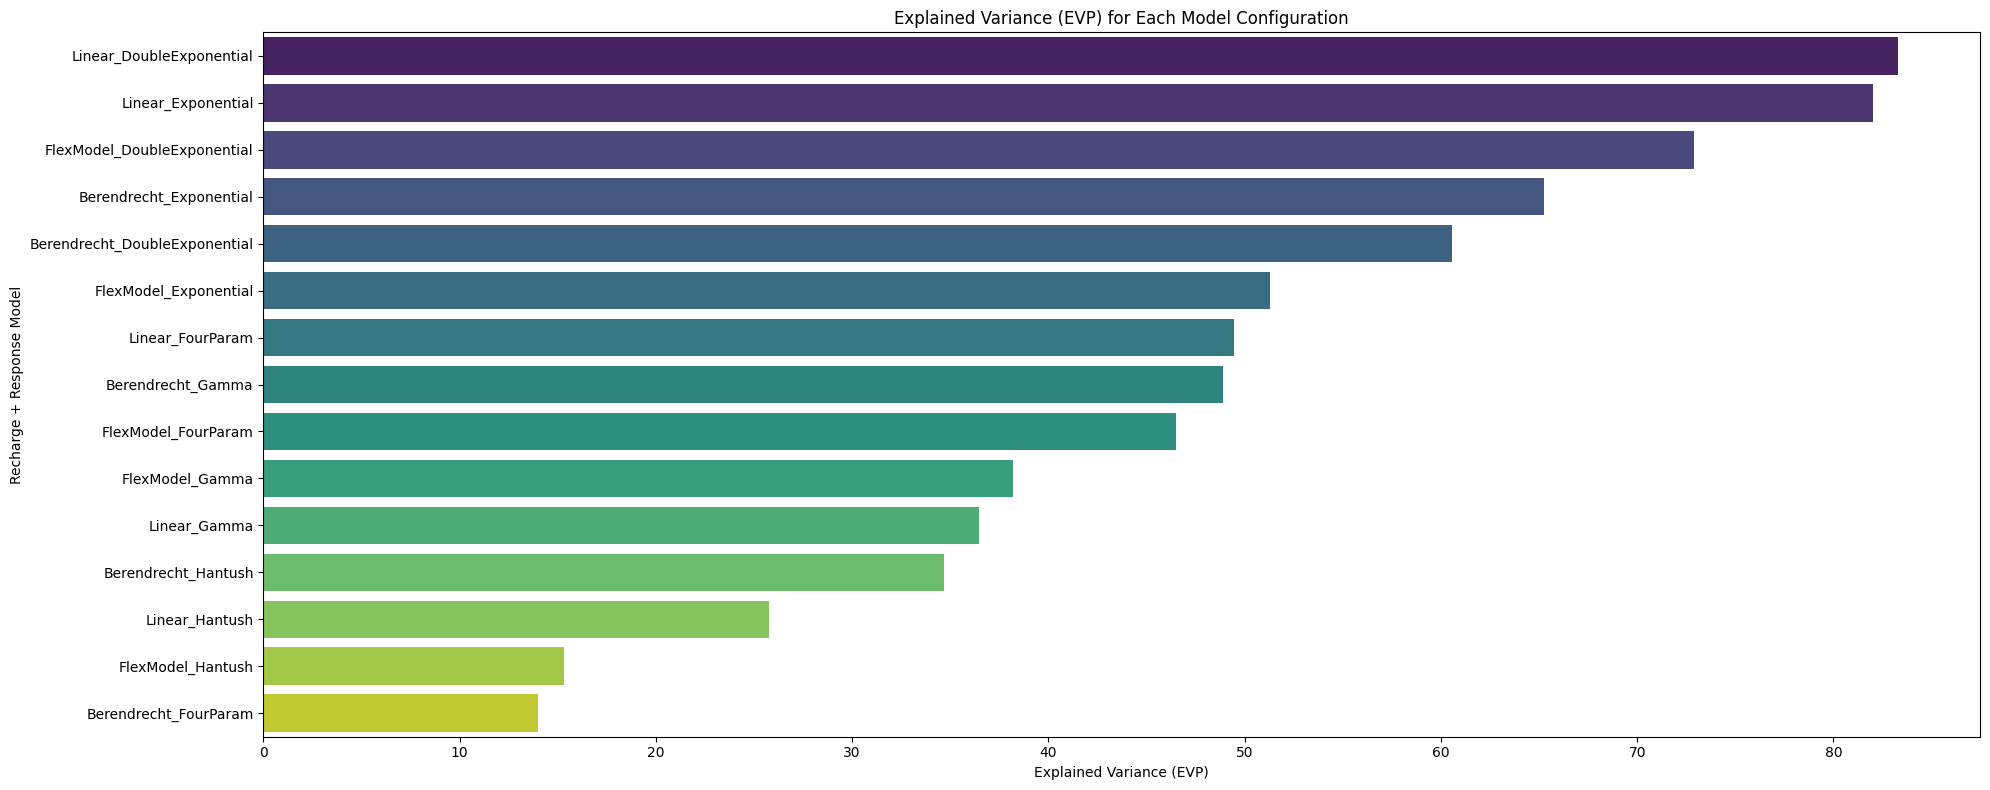

In [ ]:
def plot_evp_bar(results_df: pd.DataFrame) -> None:
    """
    Plot a bar chart of Explained Variance (EVP) for each model configuration.

    Args:
        results_df (pd.DataFrame): DataFrame with model results including 'model' and 'EVP'.
    """
    import seaborn as sns
    import matplotlib.pyplot as plt  # Moved import here to keep all imports in one place

    plt.figure(figsize=(20, 8))
    sns.barplot(data=results_df, y="model", x="EVP", palette="viridis")
    plt.title("Explained Variance (EVP) for Each Model Configuration")
    plt.xlabel("Explained Variance (EVP)")
    plt.ylabel("Recharge + Response Model")
    plt.tight_layout()
    plt.show()


plot_evp_bar(results_df)



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


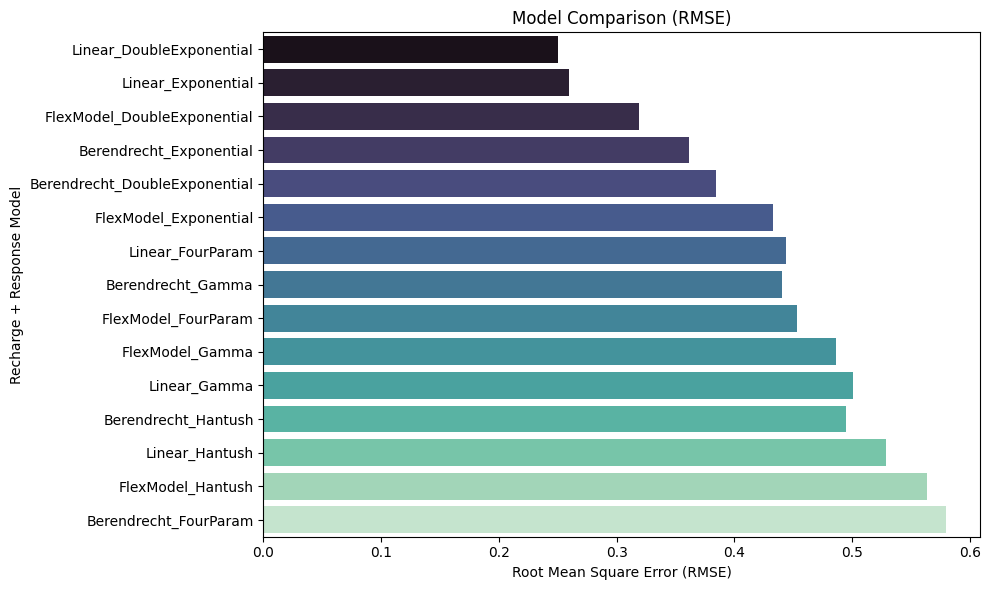

In [15]:
# Plot RMSE separately
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, y="model", x="RMSE", palette="mako")
plt.title("Model Comparison (RMSE)")
plt.xlabel("Root Mean Square Error (RMSE)")
plt.ylabel("Recharge + Response Model")
plt.tight_layout()
plt.show()

In [16]:
diagnostics_df

,model,Test,Checks,Statistic,P-value,Reject H0 ($\alpha$=0.05)
0,Linear_Exponential,Shapiroo,Normality,0.75,0.00,True
1,Linear_Exponential,D'Agostino,Normality,435.23,0.00,True
2,Linear_Exponential,Runs test,Autocorr.,-5.82,0.00,True
3,Linear_Exponential,Ljung-Box,Autocorr.,19.89,0.13,False
4,Linear_Exponential,Durbin-Watson,Autocorr.,1.95,nan,False
...,...,...,...,...,...,...
70,Berendrecht_FourParam,Shapiroo,Normality,0.64,0.00,True
71,Berendrecht_FourParam,D'Agostino,Normality,589.41,0.00,True
72,Berendrecht_FourParam,Runs test,Autocorr.,-6.07,0.00,True
73,Berendrecht_FourParam,Ljung-Box,Autocorr.,39.66,0.00,True


The integral is probably divergent, or slowly convergent.The integral is probably divergent, or slowly convergent.

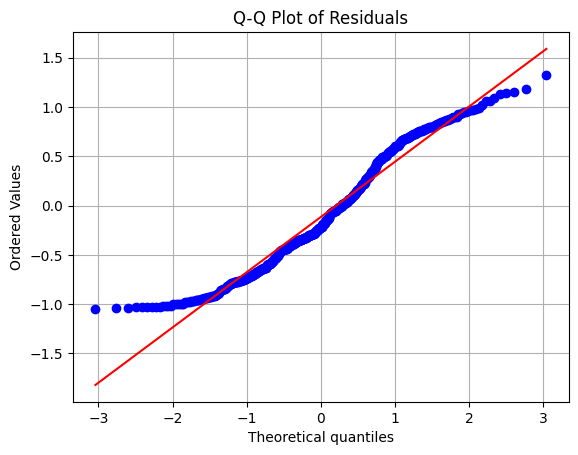

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_qq_residuals(residuals: pd.Series) -> None:
    """
    Plot a Q-Q plot of model residuals against a normal distribution.

    Args:
        residuals (pd.Series): Model residuals.
    """
    from scipy import stats

    plt.figure()
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.grid(True)
    plt.show()

plot_qq_residuals(ml.residuals())

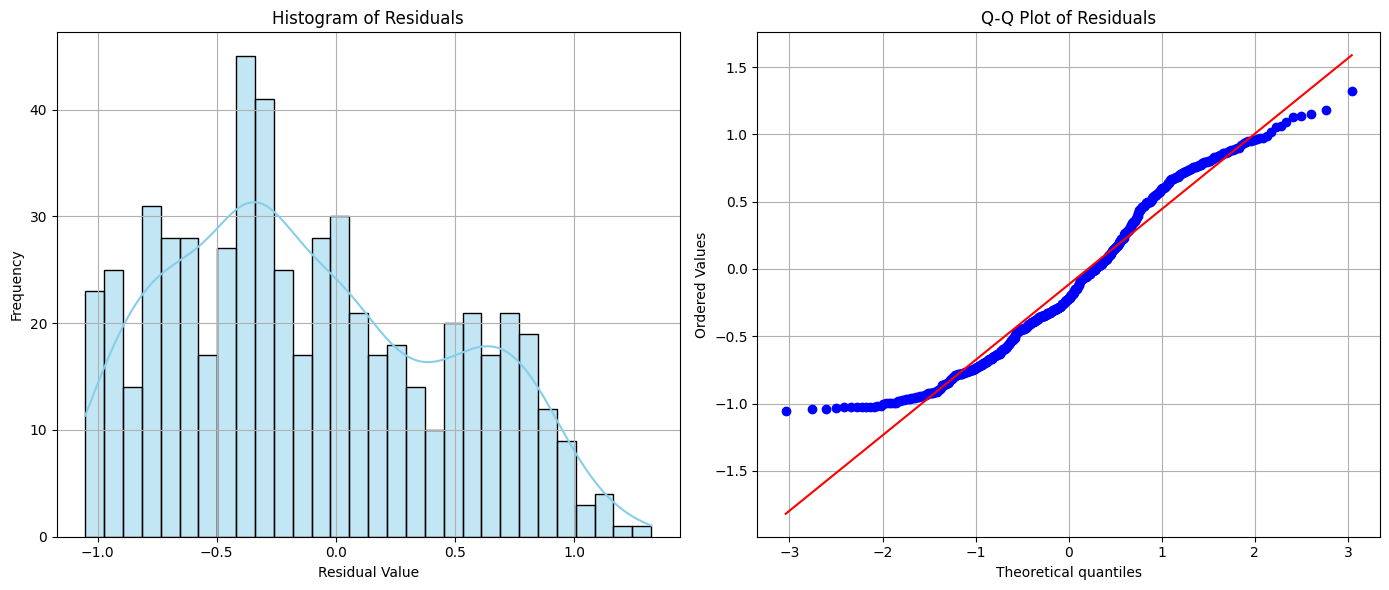

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_residuals_hist_qq(residuals: pd.Series) -> None:
    """
    Plot a histogram and Q-Q plot of model residuals side by side.

    Args:
        residuals (pd.Series): Model residuals.
    """
    import seaborn as sns
    from scipy import stats
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    sns.histplot(residuals, bins=30, kde=True, ax=axs[0], color="skyblue")
    axs[0].set_title("Histogram of Residuals")
    axs[0].set_xlabel("Residual Value")
    axs[0].set_ylabel("Frequency")
    axs[0].grid(True)
    stats.probplot(residuals, dist="norm", plot=axs[1])
    axs[1].set_title("Q-Q Plot of Residuals")
    axs[1].grid(True)
    plt.tight_layout()
    plt.show()

plot_residuals_hist_qq(ml.residuals())
